## Cell Anneal Example, starting from single cell reference
- example data used is healthy liver LCM and Hassan's liver single cells

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from cellanneal import make_gene_dictionary
from cellanneal import deconvolve
from cellanneal import plot_pies_from_df, plot_mix_heatmap, plot_1D_lines, plot_repeats, plot_scatter
from cellanneal import repeat_annealing

#### A) Preparation and gene list export

In [2]:
# data paths
# if you want to run on Windows, you need to fix the beginning of all paths below ("X:" etc)
sc_ref_import_path = "/Users/lisa/X/lisabu/sim_anneal_deconvolution/cellanneal/cellanneal/examples/example_data/sc_ref_human_liver_patient5.csv"
bulk_import_path = "/Users/lisa/X/lisabu/sim_anneal_deconvolution/cellanneal/cellanneal/examples/example_data/bulk_human_liver_tumor_patient5.csv"

In [3]:
# import single cell based reference
sc_ref_df = pd.read_csv(sc_ref_import_path, index_col=0)

In [4]:
# import bulk data
bulk_df = pd.read_csv(bulk_import_path, index_col=0)

In [5]:
# produce lists of genes on which to base deconvolution
# choose minimum dispersion and min and max expression here
gene_dict = make_gene_dictionary(
                    sc_ref_df,
                    bulk_df,
                    disp_min=0.5,
                    bulk_min=1e-5,
                    bulk_max=0.01,
                    remove_mito=True)

3713 highly variable genes identified in cell type reference.
	2430 of these are within thresholds for sample 1_nmc_H5
	2494 of these are within thresholds for sample 2_nmb_H5
	2749 of these are within thresholds for sample 3_mb_H5
	2671 of these are within thresholds for sample 4_mc_H5
	2513 of these are within thresholds for sample 5_mcol_H5


In [6]:
# export each of the gene lists to a separate csv file for external inspection
for sample in gene_dict.keys():
    # add newlines to list
    list_newlines=map(lambda x:x+'\n', gene_dict[sample])
    # open file for this sample
    this_file = open('results/gene_list_{}.txt'.format(sample), 'w')
    # write the list to this file and close it
    this_file.writelines(list_newlines)
    this_file.close()

### B) CellAnneal

In [7]:
# run deconvolution, set parameters here
all_mix_df = deconvolve(sc_ref_df=sc_ref_df,
                     bulk_df=bulk_df,
                     maxiter=1000,
                     gene_dict=gene_dict,
                     no_local_search=True)

Deconvolving sample 1_nmc_H5 ...
Deconvolving sample 2_nmb_H5 ...
Deconvolving sample 3_mb_H5 ...
Deconvolving sample 4_mc_H5 ...
Deconvolving sample 5_mcol_H5 ...


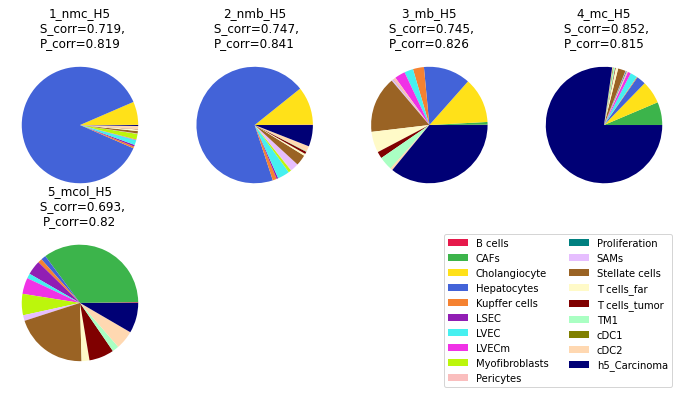

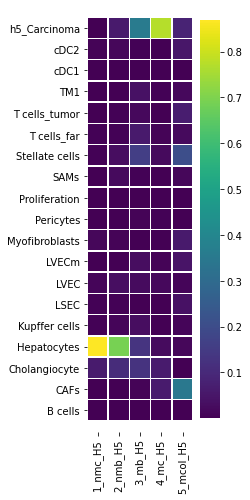

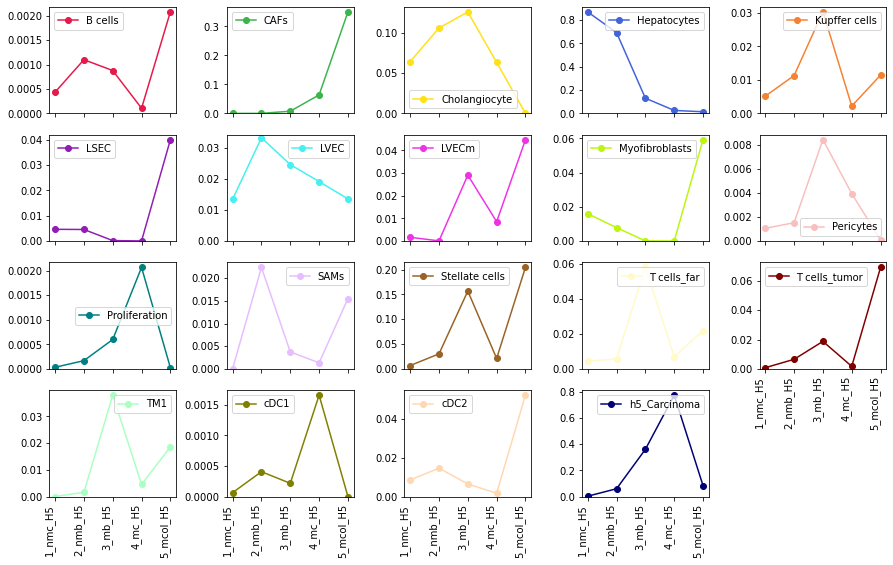

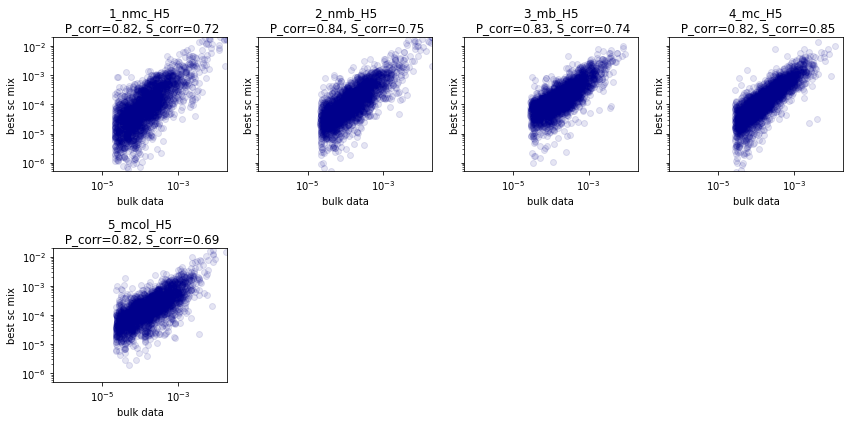

In [8]:
# plot results
plot_pies_from_df(all_mix_df)
plot_mix_heatmap(all_mix_df, rownorm=False)
plot_1D_lines(all_mix_df)
plot_scatter(all_mix_df, bulk_df, sc_ref_df, gene_dict)